In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
data['Timestamp'] = data['Timestamp'].astype(float)

In [ ]:
data_nan = data.dropna()

In [ ]:
data_nan.reset_index(inplace=True, drop=True)
data_nan.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.325318e+09,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1.325347e+09,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1.325351e+09,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1.325351e+09,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1.325391e+09,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaling =  StandardScaler()
x1 = data_nan.iloc[:4000,0].values
y1 = data_nan.iloc[:4000,-1].values
x1 = np.reshape(x1,(-1,1))
y1 = np.reshape(y1,(-1,1))
x1 = scaling.fit_transform(x1)
y1 = scaling.fit_transform(y1) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2,
                                                     random_state=2021)

In [ ]:
x_train1 = np.reshape(x_train1,(-1,1))
x_test1 = np.reshape(x_test1,(-1,1))
y_train1 = np.reshape(y_train1,(-1,1))
y_test1 = np.reshape(y_test1,(-1,1))
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(3200, 1)
(800, 1)
(3200, 1)
(800, 1)


In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf',C=50)
svr_reg.fit(x_train1,y_train1)
y_pred1 = svr_reg.predict(x_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


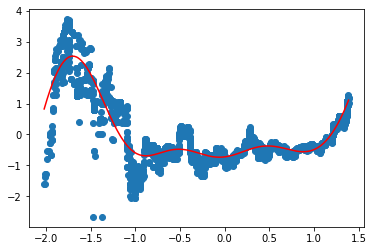

In [ ]:
plt.scatter(x1,y1)
plt.plot(x1,svr_reg.predict(x1),color='red')
plt.show()

In [ ]:
r_squared_svr = svr_reg.score(x1,y1)
print(r_squared_svr)

0.8102312851521193


Decision Trees

In [ ]:
x2 = data_nan['Timestamp'].values
y2 = data_nan['Weighted_Price'].values
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,
                                                     random_state=2021)

In [ ]:
x_train2 = np.reshape(x_train2,(-1,1))
x_test2 = np.reshape(x_test2,(-1,1))
y_train2 = np.reshape(y_train2,(-1,1))
y_test2 = np.reshape(y_test2,(-1,1))
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(2891015, 1)
(722754, 1)
(2891015, 1)
(722754, 1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='mse')
dt_reg.fit(x_train2,y_train2)
y_pred2 = dt_reg.predict(x_test2)

In [ ]:
x2 = np.reshape(x2,(-1,1))
y2 = np.reshape(y2,(-1,1))
r_squared_dt = dt_reg.score(x2,y2)
print(r_squared_dt)

0.9999989441155006


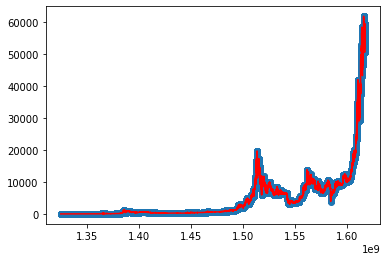

In [ ]:
plt.scatter(x2,y2)
plt.plot(x2,dt_reg.predict(x2),color='red')
plt.show()

In [ ]:
from sklearn.metrics import max_error
max_error(y_test2,y_pred2)

984.3059179999909

Random Forest

In [ ]:
x3 = data_nan.iloc[:4000,0].values
y3 = data_nan.iloc[:4000,-1].values
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.2,
                                                     random_state=2021)

In [ ]:
x_train3 = np.reshape(x_train3,(-1,1))
x_test3 = np.reshape(x_test3,(-1,1))
y_train3 = np.reshape(y_train3,(-1,1))
y_test3 = np.reshape(y_test3,(-1,1))
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(3200, 1)
(800, 1)
(3200, 1)
(800, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train3,y_train3)
y_pred3 = rf_reg.predict(x_test3) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x3 = np.reshape(x3,(-1,1))
y3 = np.reshape(y3,(-1,1))
r_squared_rf = rf_reg.score(x3,y3)
print(r_squared_rf)

0.9901084728821828


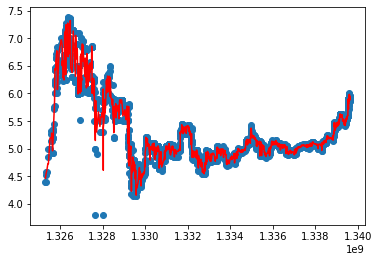

In [ ]:
plt.scatter(x3,y3)
plt.plot(x3,rf_reg.predict(x3),color='red')
plt.show()

In [ ]:
from sklearn.metrics import max_error
max_error(y_test3,y_pred3)

1.9234828093639997